In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import math
import os

In [5]:
#CSF
def CSF(tv_size,tv_res,dist):
  optim_dist = tv_size*6/(tv_res*0.0087)
  if optim_dist>dist:
    print("Optimal distance: {}".format(dist))
  else:
    print("Optimal distance: {}".format(optim_dist))

In [6]:
CSF(40,1920,120)

Optimal distance: 14.367816091954023


Airplane:


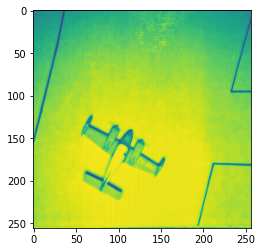

APC: 


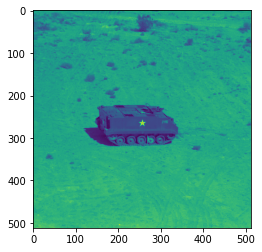

Aerial: 


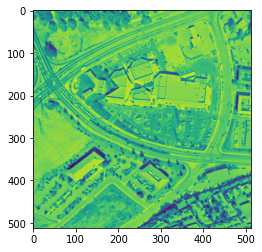

In [4]:
#GRAY SCALE IMAGES
airplane_img = image.imread('/content/5.1.11.tiff')
Aerial_img = image.imread('/content/5.2.09.tiff')
APC_img = image.imread('/content/7.1.08.tiff')
print("Airplane:")
plt.imshow(airplane_img)
plt.show()
print("APC: ")
plt.imshow(APC_img)
plt.show()
print("Aerial: ")
plt.imshow(Aerial_img)
plt.show()

In [8]:
airplane_img.shape

(256, 256)

In [9]:
os.stat("5.1.11.tiff").st_size

65670

In [10]:
b = bin(212).replace("0b","")
b[3]

'1'

In [5]:
def bitplane(img,b):
  bit_array = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      binary = bin(img[i][j])[2:].zfill(8)
      bit_array[i][j] = int(binary[b])
  return bit_array
      


In [6]:
def grayscale(img_path,name,bit_plane_index):
  img = image.imread(img_path)
  print(str(name))
  plt.imshow(img)
  plt.show()
  print("Minimum intensity: {}".format(img.min()))
  print("Maximum intensity: {}".format(img.max()))
  bits = math.log(img.max(),2)
  print("Bits needed: {}".format(bits))
  print("Resolution: {}".format(img.shape))
  bytes_needed = float((bits*img.shape[0]*img.shape[1])/8)
  efficiency = bytes_needed/os.stat(img_path).st_size
  print("Efficiency of compression: {:.2f}%".format(efficiency*100))
  print("Bit array: {}".format(bit_plane_index))
  bit_array = bitplane(img,bit_plane_index)
  plt.imshow(bit_array)
  plt.show()







airplane


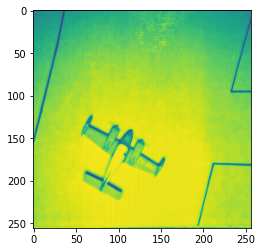

Minimum intensity: 0
Maximum intensity: 232
Bits needed: 7.857980995127572
Resolution: (256, 256)
Efficiency of compression: 98.02%
Bit array: 4


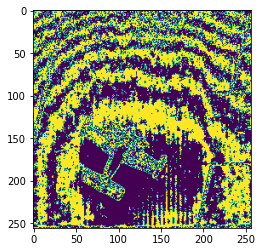

In [13]:
grayscale('5.1.11.tiff','airplane',4)

In [19]:
#BINARY IMAGE PROCESSING
def hist(img):
  arr = np.zeros(256)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      arr[img[i][j]]+=1
  return arr

airplane_arr = hist(airplane_img)
aerial_arr = hist(Aerial_img)
apc_arr = hist(APC_img)


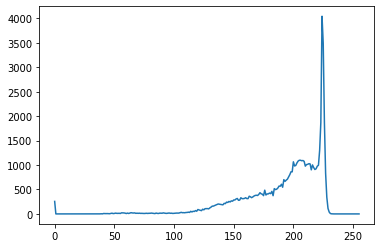

In [15]:
plt.plot(airplane_arr)

Airplane img
Modality: Modal

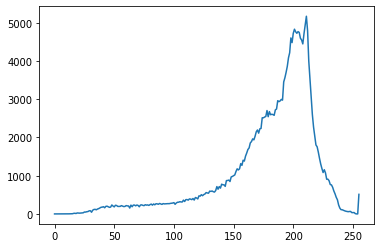

In [16]:
plt.plot(aerial_arr)

Aerial img Modality:Bi-Modal or Multi-modal

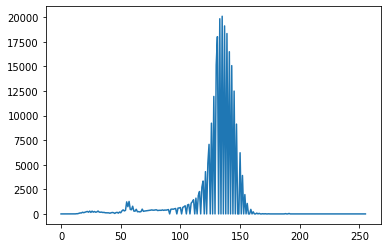

In [17]:
plt.plot(apc_arr)

APC img Modality: Multi-Modal


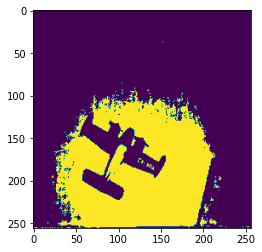

In [18]:
def binarise(img,threshold):
  img1 = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img1[i][j]<threshold:
        img1[i][j] = 0
      else:
        img1[i][j] = 1
  return img1


plt.imshow(binarise(airplane_img,216))
plt.show()

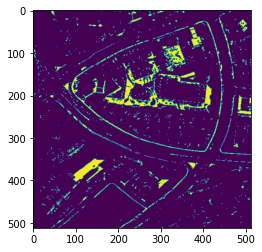

In [19]:
plt.imshow(binarise(Aerial_img,220))
plt.show()

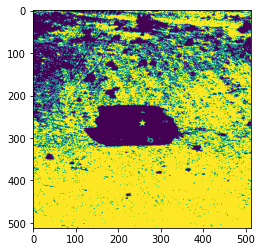

In [20]:
plt.imshow(binarise(APC_img,130))
plt.show()

In [21]:
sum(airplane_arr[0:50])

330.0

In [24]:
#OTSU'S ALGORITHM INTRA-CLASS VARIANCE
def otsu1(img):
  variance_arr = np.zeros(255)
  hist_arr = hist(img)
  img1 = img.copy()
  for i in range(255):
    class1_prob = sum(hist_arr[0:i+1])/sum(hist_arr)
    class2_prob = sum(hist_arr[i+1:])/sum(hist_arr)
    class1_var = np.var(hist_arr[0:i+1])
    class2_var = np.var(hist_arr[i+1:])
    variance_arr[i] = (class1_prob*class1_var) + (class2_prob*class2_var)
  threshold = np.argmin(variance_arr)
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      if img1[i][j]<threshold:
        img1[i][j] = 0
      else:
        img1[i][j] = 1
  print("Threshold: {}".format(threshold))
  print("Binarised Image: ")
  plt.imshow(img1)
  plt.show()
  return img1



    

Threshold: 224
Binarised Image: 


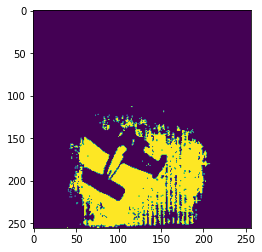

In [25]:
airplane_binary = otsu1(airplane_img)

In [24]:
def otsu2(img):
  variance_arr = np.zeros(256)
  hist_arr = hist(img)
  img1 = img.copy()
  for i in range(255):
    class1_prob = sum(hist_arr[0:i+1])/sum(hist_arr)
    class2_prob = sum(hist_arr[i+1:])/sum(hist_arr)
    # class1_var = np.var(hist_arr[0:i+1])
    # class2_var = np.var(hist_arr[i+1:])
    mean1 = 0
    mean2 = 0
    for j in range(0,i+1):
      prob1 = hist_arr[j]/sum(hist_arr)
      mean1+=j*prob1
    for k in range(i+1,256):
      prob2 = hist_arr[k]/sum(hist_arr)
      mean2+=k*prob2
    mean1 = mean1/class1_prob
    mean2 = mean2/class2_prob
    variance_arr[i] = class1_prob*class2_prob*(mean1-mean2)**2
  threshold = np.argmax(variance_arr)
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      if img1[i][j]<threshold:
        img1[i][j] = 0
      else:
        img1[i][j] = 1
      
  print("Threshold: {}".format(threshold))
  print("Binarised image: ")
  plt.imshow(img1)
  plt.show()


    




  

In [7]:
np.mean(airplane_img)

193.5538330078125

In [ ]:
def otsu2(img):
  variance_arr = np.zeros(256)
  hist_arr = hist(img)
  img1 = img.copy()
  prob_0 = 0
  mean = 0
  for i in range(255):
    prob_1 = prob_0 + hist_arr[i]/sum(hist_arr)
    mean = mean


    

In [9]:
#Connected Components
def con_comp(img):
  R = np.zeros((img.shape[0],img.shape[1]))
  k = 1
  for i in range(1,img.shape[0]):
    for j in range(1,img.shape[1]):
      if img[i][j] == 0:
        if img[i][j-1] == 1:
          if img[i-1,j] == 1:
            R[i][j] = k 
            k += 1
          elif img[i-1][j] == 0:
            R[i][j] = R[i-1][j]
        elif img[i][j-1] == 0:
          if img[i-1][j] == 1:
            R[i][j] = R[i][j-1]
          elif img[i-1][j] == 0:
            R[i][j] = min(R[i][j-1],R[i-1][j])
            

SyntaxError: ignored

In [11]:
#BINARY MORPHOLOGY
def dilate(img, win):
    res = np.zeros((img.shape[0]-2, img.shape[0]-2))
    row = 0; col = 0
    for i in range(1, img.shape[0]-1):
        col = 0
        for j in range(1, img.shape[1]-1):
            neighbourhood_ix = [[i+x, j+y] for (x,y) in win]; neighbourhood_ix = np.array(neighbourhood_ix)
            neighbourhood = img[neighbourhood_ix[:,0], neighbourhood_ix[:,1]]
            if np.any(neighbourhood):
                res[row][col] = 1
            else:
                res[row][col] = 0
            col = col + 1
        row = row + 1
    plt.imshow(res, 'gray')
    return res

In [12]:
def erode(img, win):
    res = np.zeros((img.shape[0]-2, img.shape[0]-2))
    row = 0; col = 0
    for i in range(1, img.shape[0]-1):
        col = 0
        for j in range(1, img.shape[1]-1):
            neighbourhood_ix = [[i+x, j+y] for (x,y) in win]; neighbourhood_ix = np.array(neighbourhood_ix)
            neighbourhood = img[neighbourhood_ix[:,0], neighbourhood_ix[:,1]]
            if np.all(neighbourhood):
                res[row][col] = 1
            else:
                res[row][col] = 0
            col = col + 1
        row = row + 1
    plt.imshow(res, 'gray')
    return res

In [13]:
def median(img, win):
    res = np.zeros((img.shape[0]-2, img.shape[0]-2))
    row = 0; col = 0
    for i in range(1, img.shape[0]-1):
        col = 0
        for j in range(1, img.shape[1]-1):
            neighbourhood_ix = [[i+x, j+y] for (x,y) in win]; neighbourhood_ix = np.array(neighbourhood_ix)
            neighbourhood = img[neighbourhood_ix[:,0], neighbourhood_ix[:,1]]
            n_ones = np.sum(neighbourhood)
            if n_ones > neighbourhood.shape[0] - n_ones:
                res[row][col] = 1
            else:
                res[row][col] = 0
            col = col + 1
        row = row + 1
    plt.imshow(res, 'gray')
    return res

In [14]:
cross_window = [[0,-1], [-1,0], [0,0], [0,1], [1,0]]
square_window = [[-1,1], [0,1], [1,1], [-1,0], [0,0], [1,0], [-1,-1], [0,-1], [1,-1]]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

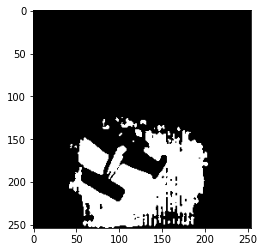

In [26]:
median(airplane_binary, square_window)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

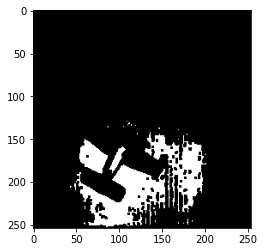

In [27]:
erode(airplane_binary, square_window)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

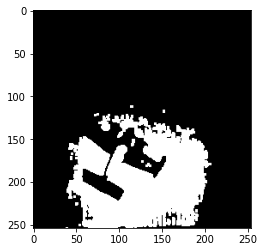

In [28]:
dilate(airplane_binary, square_window)

Dilate is dual of erode.
Erode is dual of dilate.


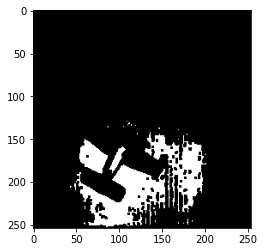

In [29]:
def dual(img, op):
    im1 = np.logical_not(img
  )
    if(op == 'erode'):
        im2 = erode(im1, square_window)
    elif(op == 'dilate'):
        im2 = dilate(im1, square_window)
    elif(op == 'median'):
        im2 = median(im1, square_window)
    im3 = np.logical_not(im2)
    return im3

res_complement = dual(airplane_binary, op='erode')
res_direct = dilate(airplane_binary, square_window)
if not np.all(res_complement - res_direct):
    print("Dilate is dual of erode.")
    
res_complement = dual(airplane_binary, op='dilate')
res_direct = erode(airplane_binary, square_window)
if not np.all(res_complement - res_direct):
    print("Erode is dual of dilate.")

Median is the dual of itself.


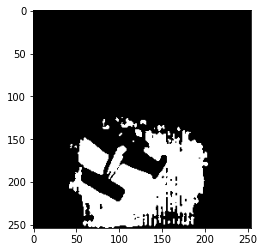

In [30]:
res_complement = dual(airplane_binary, op='median')
res_direct = median(airplane_binary, square_window)
if not np.all(res_complement - res_direct):
    print("Median is the dual of itself.")

In [31]:
def open_operation(im, window):
    op1 = erode(im, window)
    op2 = dilate(op1, window)
    return op2

def close_operation(im, window):
    op1 = dilate(im, window)
    op2 = erode(op1, window)
    return op2

In [32]:
def open_clos(im, window):
    op1 = open_operation(im, window)
    op2 = close_operation(op1, window)
    return op2

def clos_open(im, window):
    op1 = close_operation(im, window)
    op2 = open_operation(op1, window)
    return op2

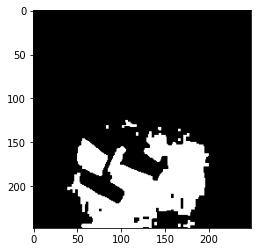

In [34]:
res = open_clos(airplane_binary, square_window)
plt.imshow(res, 'gray')

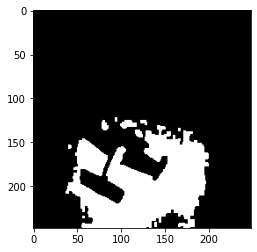

In [35]:
res = clos_open(airplane_binary, square_window)
plt.imshow(res, 'gray')